# Flight Price Prediction

### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records
FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [328]:
# Importing all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import sklearn
%matplotlib inline
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import power_transform
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [329]:
df=pd.read_excel("Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Upon review, found target variable Price has continous data so need to approach this dataset as Regression Problem

In [330]:
df.shape

(10683, 11)

There are 10683 Rows and 11 Columns including the Target variables in this Dataset

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can observe there are null values in Total_Stops and Route columns

In [332]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can observe there are 1 null values in Route and Total_Stops columns

### Resolving Null Values

In [333]:
df['Route'].fillna(df['Route'].mode()[0], inplace=True)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

Updating the Null Values in Categorical Columns with Mode

In [334]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null Values are resolved in the dataset

### Checking for Null Values in Test Data

In [335]:
ts=pd.read_excel("Test_set.xlsx")

In [336]:
ts

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [337]:
ts.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values in the Test data set

In [338]:
ts.shape

(2671, 10)

### Checking for any Unique Set of Values/ Elements in all Columns

In [339]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

Source, Total_Stops, Destination, Additional_Info, Airline columns data has a fixed set of datas.

### Analyzing the relationship between independent variable and dependent Variable

Listing down the names of all the columns present in our filtered dataframe. We will analyze each one of them with the help of some visual plots.

<AxesSubplot:xlabel='Price', ylabel='Density'>

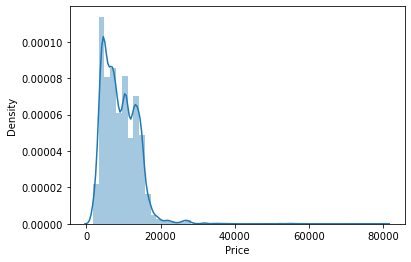

In [340]:
sns.distplot(df.Price)

From the above plot, we can observe that distribution has skewness

In [341]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


we can predict that there will be a skewness in this column since difference between 75% and max is high

In [342]:
df.skew()

Price    1.812552
dtype: float64

As predicted, skewness is high and out of range -0.50 to +0.50

In [343]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

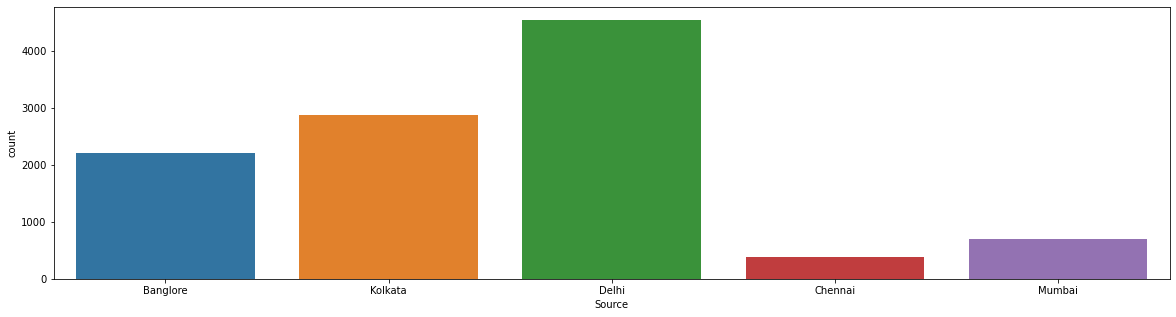

In [344]:
plt.figure(figsize=(20,5),facecolor='white')
sns.countplot(df['Source'])

Majority of Source Location is in Delhi followed by Kolkata and Bangalore

In [345]:
df['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

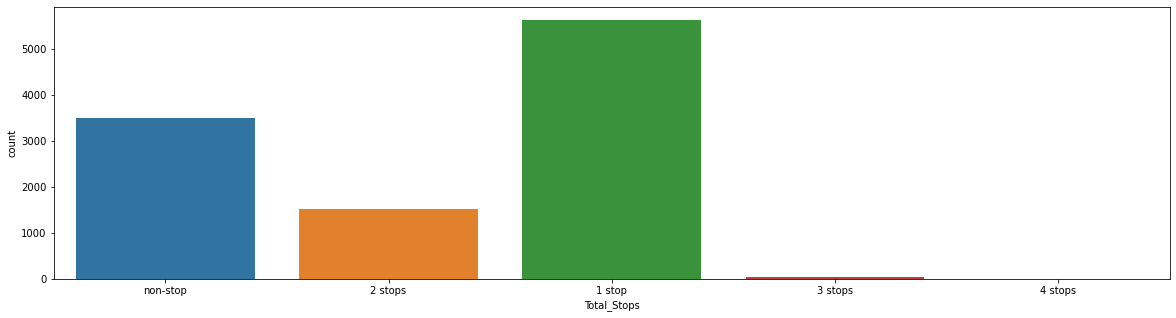

In [346]:
plt.figure(figsize=(20,5),facecolor='white')
sns.countplot(df['Total_Stops'])

Most of the flights have 1 stop followed Non-stop and 2 stops. 4 Stops Flights are least in numbers

In [347]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

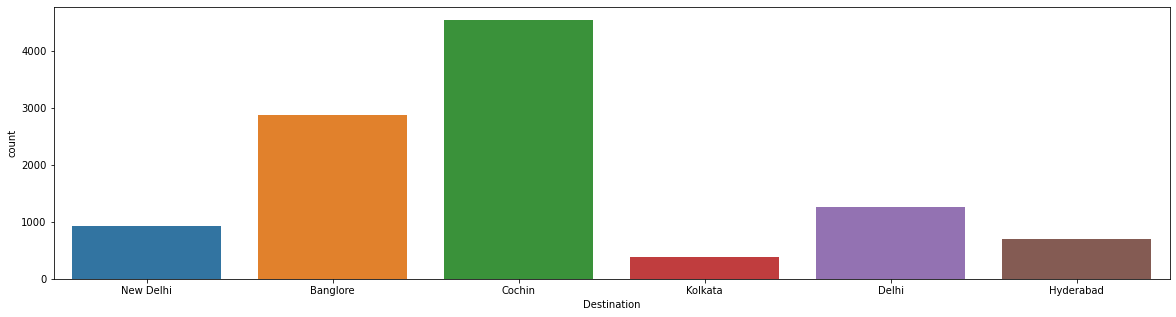

In [348]:
plt.figure(figsize=(20,5),facecolor='white')
sns.countplot(df['Destination'])

Majority of destination Location is Cochin followed by Bangalore and Delhi

In [349]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

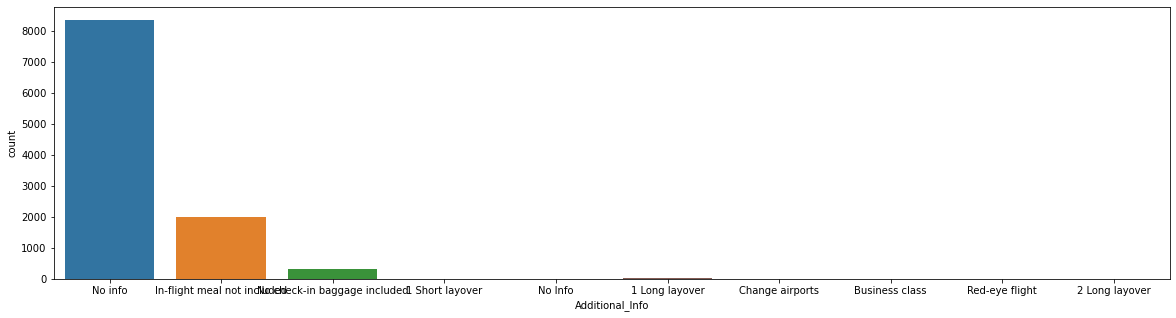

In [350]:
plt.figure(figsize=(20,5),facecolor='white')
sns.countplot(df['Additional_Info'])

In [351]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

Nearly 78% of data in Additional_Info column has No info so it would be better to drop this column for good accuracy

In [352]:
df.drop(columns = ['Additional_Info'],inplace=True)

In [353]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

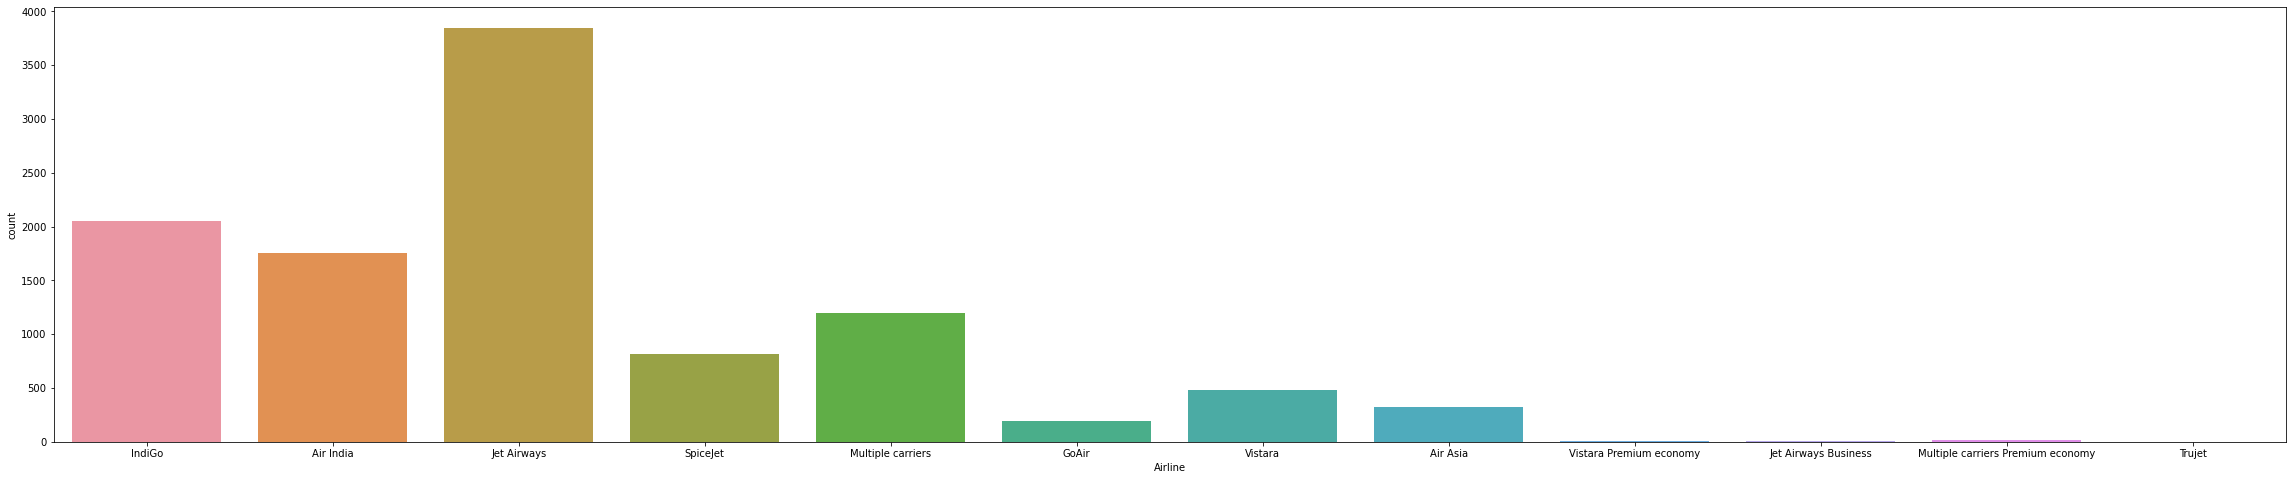

In [354]:
plt.figure(figsize=(40,8),facecolor='white')
sns.countplot(df['Airline'])

Majority of the flight trips or journey is through Jet Airways followed by IndiGo

In [355]:
df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [356]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [357]:
df['Route'].value_counts()

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → CCU → HYD                   1
BOM → RPR → VTZ → HYD             1
BOM → JDH → JAI → DEL → HYD       1
BOM → NDC → HYD                   1
CCU → RPR → HYD → BLR             1
Name: Route, Length: 128, dtype: int64

In [358]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

Route Column data indicates the path of flight i.e. the source, destination and stoppages. which is represented by these 3 listed columns so dropping the route column data would be effective approach

In [359]:
df.drop(columns = ['Route'],inplace=True)

In [360]:
df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
21:40      1
01:35      1
04:15      1
16:25      1
04:50      1
Name: Dep_Time, Length: 222, dtype: int64

In [361]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [362]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
27h 55m      1
42h 45m      1
5m           1
42h 5m       1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [363]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [364]:
df['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:50 02 Jun      1
03:35 28 Apr      1
10:40 02 May      1
16:15 02 May      1
02:45 28 Jun      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [365]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

Duration indicates the difference between Arrival_Time and Dep_Time; So we can drop the Arrival_Time and Dep_Time

In [366]:
df.drop(columns = ['Arrival_Time', 'Dep_Time'], inplace=True)

In [367]:
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,2h 40m,non-stop,12648


#### Splitting the Date_of_Journey into Date and Month separtely

In [368]:
df["Journey_date"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [369]:
df.drop(columns = ['Date_of_Journey'], inplace=True)

In [370]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3


### Converting the Duration value into Minutes

In [371]:
dur=df['Duration'].tolist() 

for i in range(0,len(dur)):
    dur[i]=dur[i].replace("h","*60").replace(" ","+").replace("m","") 
for i in range(0,len(dur)):
    dur[i]=eval(dur[i])    

In [372]:
dur1=pd.DataFrame({"Duration_mins":dur})

In [373]:
dur1.index=df.index

In [374]:
df['Duration_mins'] = dur1['Duration_mins']

In [375]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,285
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,150
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4,180
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,160


In [376]:
df.drop(columns = ['Duration'], inplace=True)
df

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,285
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,150
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,180
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,160


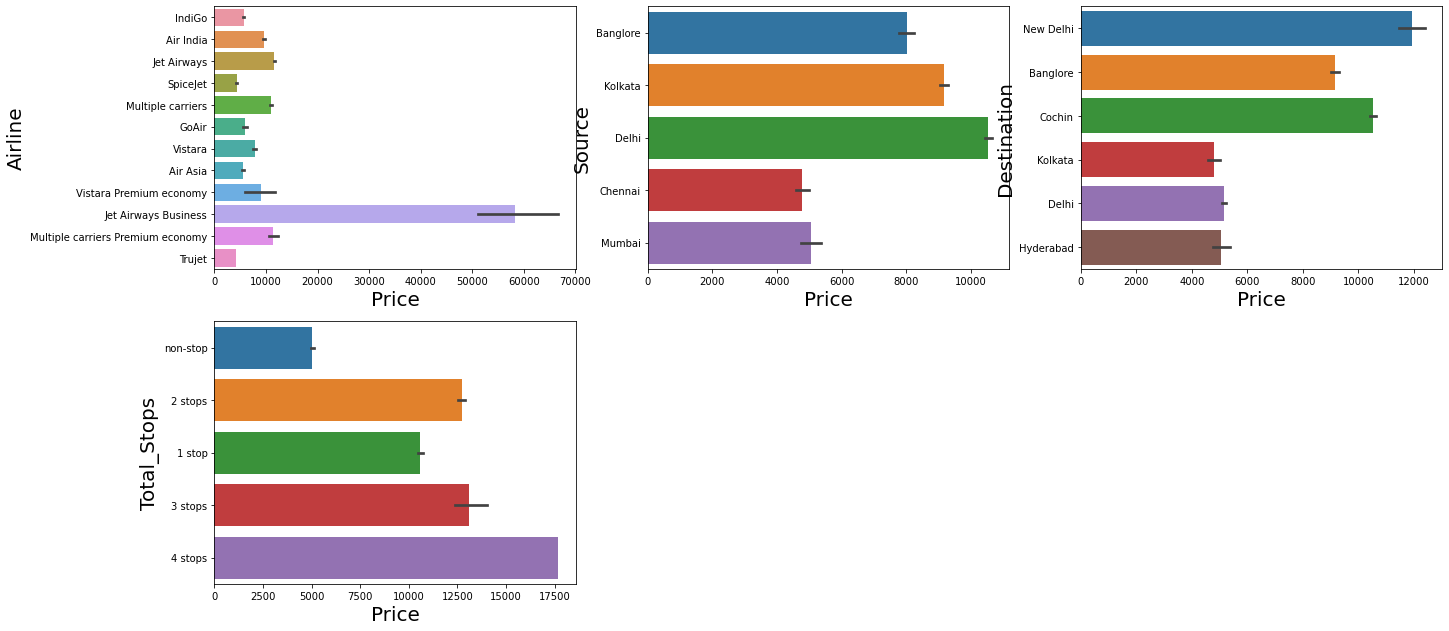

In [377]:
plt.figure(figsize=(22,28),facecolor='white')
plot_number=1
x_plot = df[['Airline', 'Source', 'Destination', 'Total_Stops']]
y_plot = df['Price']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('Price',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

We can observe the below listed details from above graphs

1. Price of Jet Airways Business is costly which is followed by Multiple carriers Premium economy and Jet Airways.
   Trujet and Spicejet has low price

2. Delhi source flight price are higher followed by Kolkatta and Bangalore
   Chennai source flight price is less
   
3. New Delhi destination flight price are higher followed by Cochin and Bangalore
   Kolkatta destination flight price is less
   
4. Price of 4 stops flight is higher and non-stop flight price is less

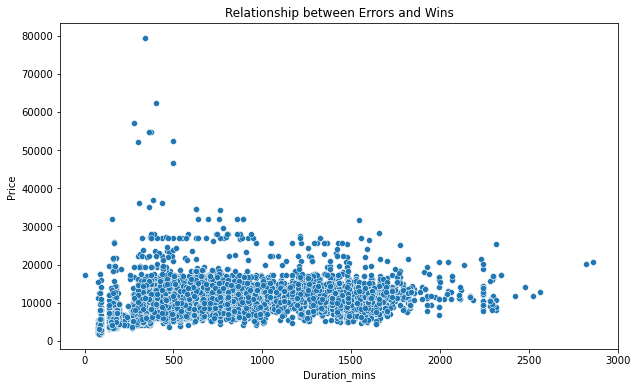

In [378]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Errors and Wins')
sn.scatterplot(df['Duration_mins'], df['Price']);

we can observe that as duration increases, price also increases

### Encoding the Categorical Data using Label Encoder

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10683 non-null  object
 1   Source         10683 non-null  object
 2   Destination    10683 non-null  object
 3   Total_Stops    10683 non-null  object
 4   Price          10683 non-null  int64 
 5   Journey_date   10683 non-null  int64 
 6   Journey_month  10683 non-null  int64 
 7   Duration_mins  10683 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 667.8+ KB


In [380]:
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Total_Stops'] = le.fit_transform(df['Total_Stops'])

In [381]:
df.shape

(10683, 8)

Crosschecking whether same Data Shape is retained. Same Data shape is retained

In [382]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,3897,24,3,170
1,1,3,0,1,7662,1,5,445
2,4,2,1,1,13882,9,6,1140
3,3,3,0,0,6218,12,5,325
4,3,0,5,0,13302,1,3,285
...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,150
10679,1,3,0,4,4145,27,4,155
10680,4,0,2,4,7229,27,4,180
10681,10,0,5,4,12648,1,3,160


Crosschecking whether categorical data is encoded or not. It can be confirmed that encoding is done correctly

In [383]:
df.describe()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,1.458111,9087.064121,13.508378,4.708602,643.093232
std,2.352155,1.177221,1.474782,1.806290,4611.359167,8.479277,1.164357,507.862001
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,5.000000
25%,3.000000,2.000000,0.000000,0.000000,5277.000000,6.000000,3.000000,170.000000
50%,4.000000,2.000000,1.000000,0.000000,8372.000000,12.000000,5.000000,520.000000
75%,4.000000,3.000000,2.000000,4.000000,12373.000000,21.000000,6.000000,930.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,6.000000,2860.000000


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Airline        10683 non-null  int32
 1   Source         10683 non-null  int32
 2   Destination    10683 non-null  int32
 3   Total_Stops    10683 non-null  int32
 4   Price          10683 non-null  int64
 5   Journey_date   10683 non-null  int64
 6   Journey_month  10683 non-null  int64
 7   Duration_mins  10683 non-null  int64
dtypes: int32(4), int64(4)
memory usage: 500.9 KB


Analyzing the changes in dataset after encoding. All values are numericals now.

### Checking Correlation between each columns data

In [385]:
corr_mat=df.corr()
corr_mat

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
Airline,1.000000,-0.013401,0.018479,0.036064,-0.039520,0.026238,0.024643,-0.159803
Source,-0.013401,1.000000,-0.592574,-0.225601,0.015998,0.004898,0.183268,0.161874
Destination,0.018479,-0.592574,1.000000,0.337883,-0.071112,-0.040998,-0.364686,-0.257365
Total_Stops,0.036064,-0.225601,0.337883,1.000000,-0.571174,0.029290,-0.026346,-0.602313
Price,-0.039520,0.015998,-0.071112,-0.571174,1.000000,-0.153738,-0.103651,0.506371
Journey_date,0.026238,0.004898,-0.040998,0.029290,-0.153738,1.000000,-0.038378,-0.022562
Journey_month,0.024643,0.183268,-0.364686,-0.026346,-0.103651,-0.038378,1.000000,0.014870
Duration_mins,-0.159803,0.161874,-0.257365,-0.602313,0.506371,-0.022562,0.014870,1.000000


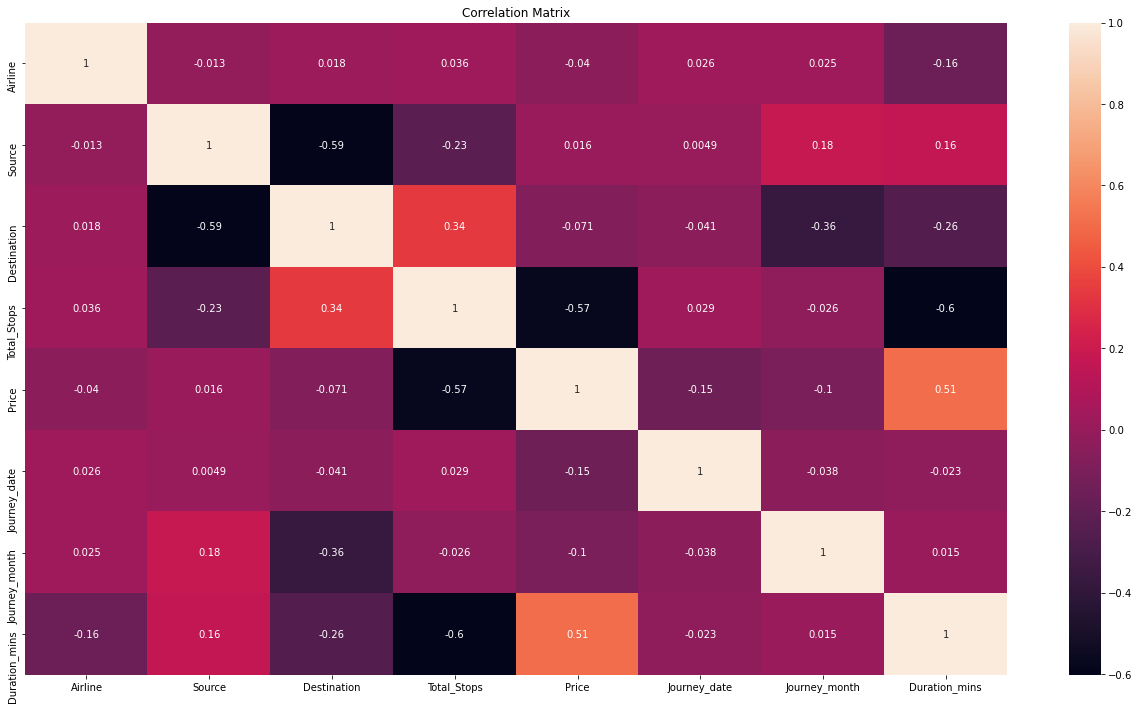

In [386]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

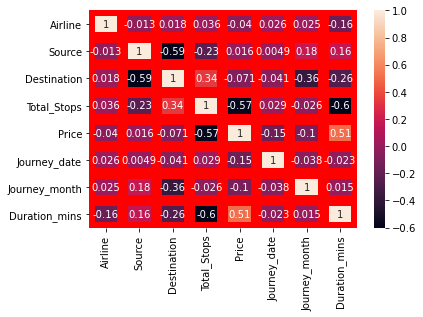

In [387]:
sns.heatmap(corr_mat,annot=True,linewidths=10,linecolor='r')

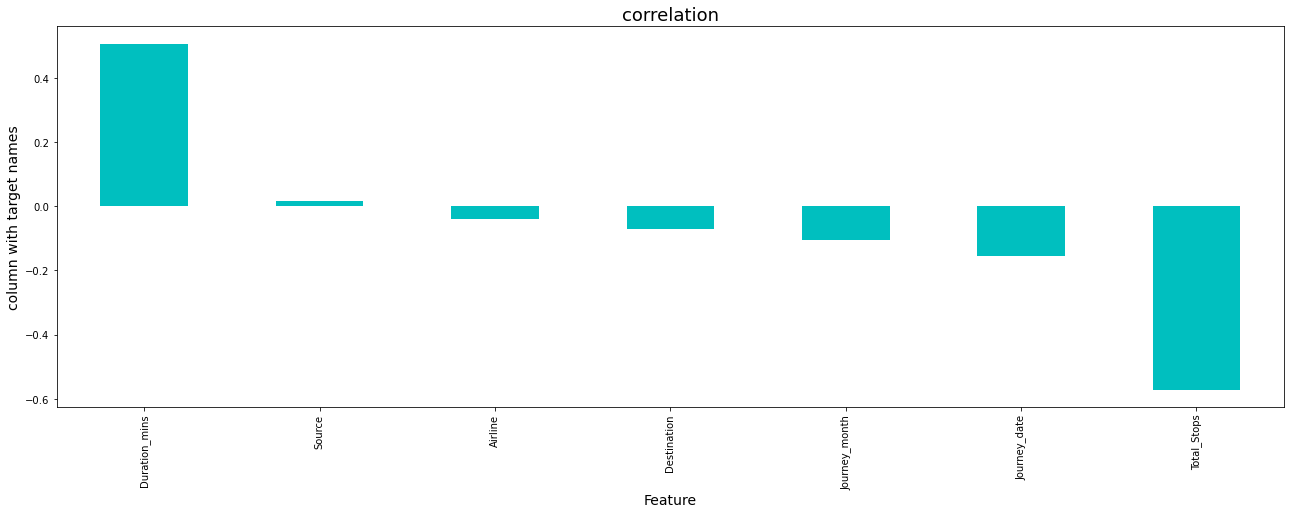

In [388]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [389]:
corr_mat["Price"].sort_values(ascending=False)

Price            1.000000
Duration_mins    0.506371
Source           0.015998
Airline         -0.039520
Destination     -0.071112
Journey_month   -0.103651
Journey_date    -0.153738
Total_Stops     -0.571174
Name: Price, dtype: float64

Using Heatmap, Correlation Matrix we can conclude below observations for Target Variable primary_fuel


1. Duration_mins is positively correlated with Price Column data (in Positive Correlation Descending Order) reasonably


2. Total_Stops, Journey_date, Journey_month are negatively correlated with Price Column data (in Negative Correlation Descending Order)


3. Source, Airline column data has very less correlation with Price Column Data. If the Model Accuracy is less, these columns can be dropped because of very less correlationship with Target Variable

### Checking for Outliers through boxplots and analyzing each column Outliers 

In [390]:
x1 = df.drop(columns=['Price']).copy()
y1 = df['Price'].copy()
x1_outlier=x1.copy()
x1_outlier

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,24,3,170
1,1,3,0,1,1,5,445
2,4,2,1,1,9,6,1140
3,3,3,0,0,12,5,325
4,3,0,5,0,1,3,285
...,...,...,...,...,...,...,...
10678,0,3,0,4,9,4,150
10679,1,3,0,4,27,4,155
10680,4,0,2,4,27,4,180
10681,10,0,5,4,1,3,160


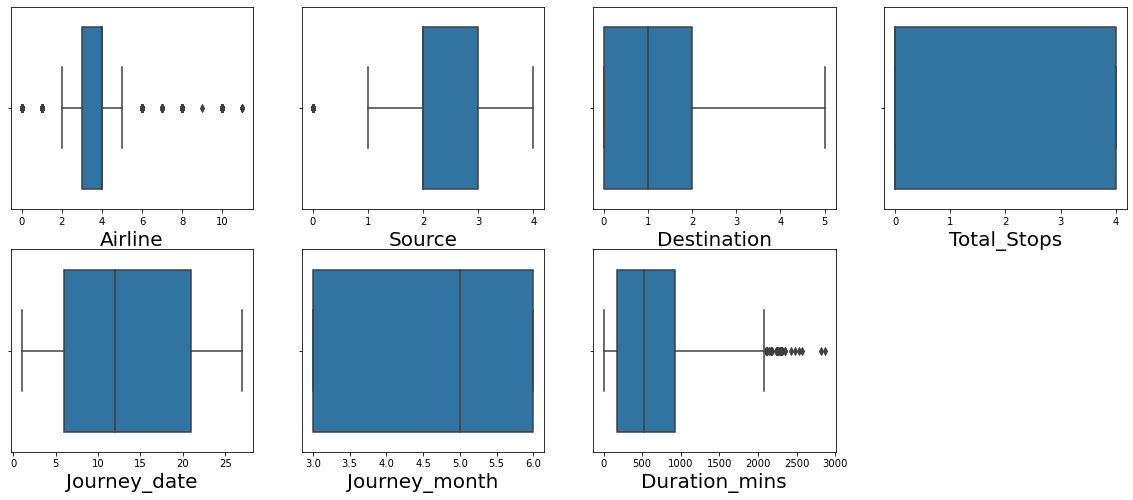

In [391]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x1_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x1_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

we can confirm that there are outliers in Duration_mins Column Data

### Outliers Removal

#### Using ZScore Method

In [392]:
from scipy.stats import zscore
z=np.abs(zscore(x1_outlier[['Duration_mins']]))
x_zscore_rg=x1_outlier[(z<3).all(axis=1)]

Applying zscore to remove the Outliers

##### Obtaining Data Set Shape after Outliers removed using zscore method

In [393]:
x_zscore_rg.shape

(10617, 7)

##### Dataset Shape before Outliers removal

In [394]:
x1_outlier.shape

(10683, 7)

In [395]:
zscore_data_loss=((10683-10617)/10683)*100
zscore_data_loss

0.6178039876439202

Upon analyzing, found 6.17% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set

#### Analyzing Outliers through Boxplots after using Zscore

### Regression Problem:

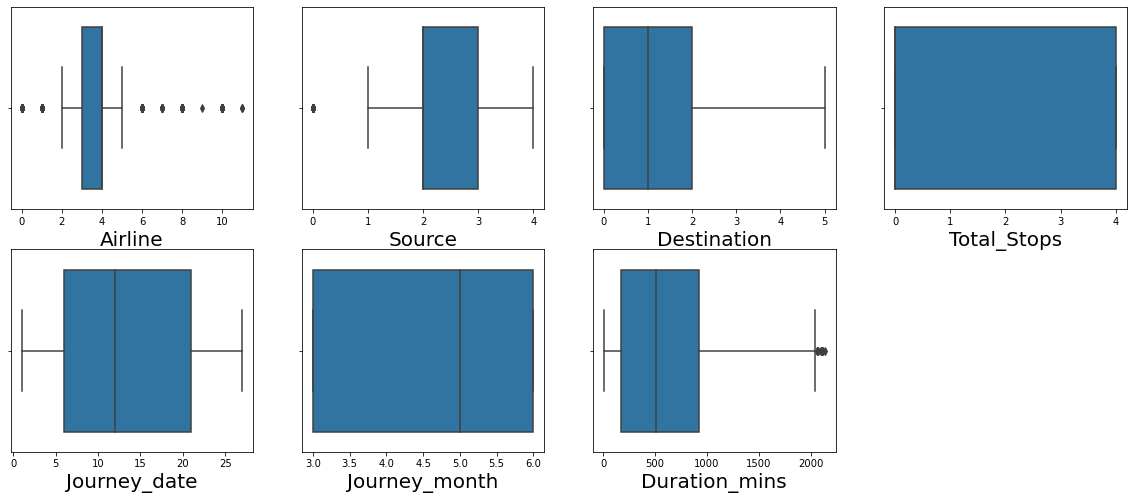

In [396]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore_rg:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore_rg[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

Upon reviewing above boxplots, we can observe significant amount of outliers are removed for both type.

### Merging the Outlier Removed Feature Data Set with Earlier Original Data Set

In [397]:
df_rg=df.copy()

In [398]:
drop_index = df_rg.index.difference(x_zscore_rg.index)
df_rg.drop(drop_index,inplace = True)
df_rg.reset_index(drop=True,inplace = True)
df_rg.shape

(10617, 8)

We can observe that Target variable is merged with outlier removed feature data set for both model problem

### Skewness Analysis and Skewness Correction

In [399]:
df_powertransform_rg = df_rg.copy()
df_powertransform_rg

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,3897,24,3,170
1,1,3,0,1,7662,1,5,445
2,4,2,1,1,13882,9,6,1140
3,3,3,0,0,6218,12,5,325
4,3,0,5,0,13302,1,3,285
...,...,...,...,...,...,...,...,...
10612,0,3,0,4,4107,9,4,150
10613,1,3,0,4,4145,27,4,155
10614,4,0,2,4,7229,27,4,180
10615,10,0,5,4,12648,1,3,160


In [400]:
x1_rg = df_powertransform_rg.drop(columns=['Price'])
y1_rg = df_powertransform_rg['Price']
y1_rg.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
11647      1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1852, dtype: int64

In [401]:
x1_rg.skew()

Airline          0.728798
Source          -0.423207
Destination      1.239195
Total_Stops      0.627492
Journey_date     0.116930
Journey_month   -0.395443
Duration_mins    0.774266
dtype: float64

We can observe Duration_mins columns (Original Continous data column) has skewness outside the allowable range of -0.50 to +0.50

In [402]:
x2_rg=x1_rg[['Duration_mins']]
x2_rg_skew = power_transform(x2_rg)
x2_rg_skew = pd.DataFrame(x2_rg_skew, columns=x2_rg.columns)
x2_rg_skew.skew()

Duration_mins   -0.049319
dtype: float64

We can observe that skewness of Duration_mins column data is reduced drastically and within allowable range of -0.50 to +0.50

#### Analyzing the distribution plots after skewness correction

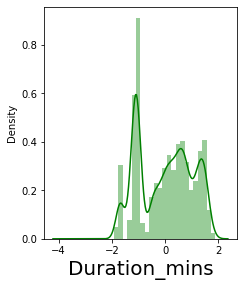

In [403]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x2_rg_skew:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x2_rg_skew[i], color = 'green')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected

### Merging the Skewness Corrected Feature Data Set with Earlier Original Data Set

In [404]:
drop_index = df_rg.index.difference(x2_rg_skew.index)
df_rg.drop(drop_index,inplace = True)
df_rg.reset_index(drop=True,inplace = True)
df_rg.shape

(10617, 8)

### Feature and Target Selection

In [405]:
x_rg = df_rg.drop(columns=['Price'])
y_rg = df_rg['Price']
y_rg.value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
11647      1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1852, dtype: int64

### Applying Standard Scaler in order to check the Multicollinearity

In [406]:
sc=StandardScaler()
x_scaled_rg=sc.fit_transform(x_rg)
x_scaled_rg

array([[-0.41625799, -1.65504247,  2.41308981, ...,  1.23774343,
        -1.47588977, -0.94021252],
       [-1.26688085,  0.88812415, -0.97299231, ..., -1.47631605,
         0.2457519 , -0.38154241],
       [ 0.00905344,  0.04040194, -0.29577588, ..., -0.53229536,
         1.10657274,  1.03036934],
       ...,
       [ 0.00905344, -1.65504247,  0.38144054, ...,  1.59175118,
        -0.61506893, -0.91989724],
       [ 2.56092202, -1.65504247,  2.41308981, ..., -1.47631605,
        -1.47588977, -0.9605278 ],
       [-1.26688085,  0.04040194, -0.29577588, ..., -0.53229536,
         0.2457519 , -0.26980838]])

### Obtaining Multicollinearity using Variance Inflation Factor

In [407]:
vif_rg = pd.DataFrame().copy()

In [408]:
vif_rg["Columns"] = x_rg.columns
vif_rg['vif_rg'] = [variance_inflation_factor(x_scaled_rg,i) for i in range(x_scaled_rg.shape[1])]
vif_rg

,Columns,vif_rg
0,Airline,1.029136
1,Source,1.546272
2,Destination,1.889792
3,Total_Stops,1.741371
4,Journey_date,1.009079
5,Journey_month,1.177395
6,Duration_mins,1.678304


From above set, we can observe that most of the columns have same multicollinearity and VIF. So we couldnt get an idea through so we shall proceed with PCA

### Principle Component Analysis 

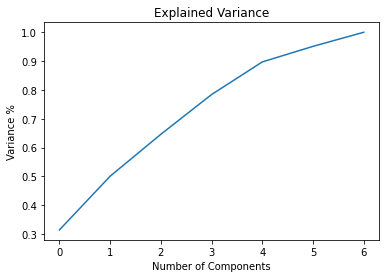

In [409]:
pca_rg = PCA()
principle_components_rg = pca_rg.fit_transform(x_scaled_rg)
plt.figure()
plt.plot(np.cumsum(pca_rg.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

In [410]:
pca_new_rg = PCA(n_components=5)
new_components_rg = pca_new_rg.fit_transform(x_scaled_rg)
x_principle_rg=pd.DataFrame(new_components_rg,columns=np.arange(5))
x_principle_rg

,0,1,2,3,4
0,3.507863,1.014039,1.042189,-0.843613,-0.081583
1,-1.059987,-0.302037,-1.731855,-0.707700,0.864858
2,-1.048586,0.003851,-0.685664,0.258265,-0.893883
3,-1.134298,-0.559202,-0.241707,-0.318739,0.561999
4,2.320569,2.300759,-1.165740,0.722134,0.186328
...,...,...,...,...,...
10612,0.196287,-0.825239,-0.987851,-1.834808,1.627820
10613,0.247556,-1.129594,1.062020,-2.238071,1.167981
10614,2.220027,-0.224463,1.340931,-0.801396,-0.538424
10615,3.721289,0.328494,-0.429133,2.777226,0.417657


We can conclude that for 95% variance, nearly 5 Principle components are contributing. So we can retain 5 components out of 7 components and build the model

### Selecting KBest Features

#### Through KBest Features Technique, Features with least score can be obtained which will help us in deciding which columns to drop before proceeding to Model Building

In [411]:
best_features_rg = SelectKBest(score_func = f_classif, k = 'all')
best_fit_rg = best_features_rg.fit(x_rg,y_rg)
scores_rg = pd.DataFrame(best_fit_rg.scores_)
columns_rg = pd.DataFrame(x_rg.columns)
columns_rg.head()
featureScores_rg = pd.concat([columns_rg,scores_rg],axis = 1)
featureScores_rg.columns = ['Features', 'Scores']
print(featureScores_rg.nlargest(7,'Scores'))

        Features      Scores
3    Total_Stops  365.920372
1         Source  185.076109
2    Destination  111.517397
0        Airline   79.388972
5  Journey_month   18.029251
6  Duration_mins   16.460227
4   Journey_date    3.098506


Upon reviewing Best Features Scores, found Journey_date has least score however, proceeding without dropping any columns since accuracy is almost same when column is retained against when column is dropped

In [412]:
x_best_rg = x_rg.copy()

In [413]:
x_best_rg

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,24,3,170
1,1,3,0,1,1,5,445
2,4,2,1,1,9,6,1140
3,3,3,0,0,12,5,325
4,3,0,5,0,1,3,285
...,...,...,...,...,...,...,...
10612,0,3,0,4,9,4,150
10613,1,3,0,4,27,4,155
10614,4,0,2,4,27,4,180
10615,10,0,5,4,1,3,160


In [414]:
x_rg = sc.fit_transform(x_rg)
y_rg = y_rg.copy()

Applying Standard Scaler since scaling will help in better accuracy

## Model Building: Regression Problem

### Finding the Best Random State 

In [415]:
x=x_rg.copy()
y=y_rg.copy()

In [416]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .23,random_state = i)
    mod_random_state =  Lasso()
    mod_random_state.fit(x_train,y_train)
    pred = mod_random_state.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"The Best Accuracy is: {maxAcc} at Random State: {maxRS}")

The Best Accuracy is: 0.45234644898589593 at Random State: 62


In [417]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .23, random_state =maxRS)

In [418]:
#Random Forest Regressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
mean_squared_error(y_test,y_rf_pred)
np.sqrt(mean_squared_error(y_test,y_rf_pred))

#Ridge Regressor Model

r = Ridge()
r.fit(x_train,y_train)
y_r_pred = r.predict(x_test)
mean_squared_error(y_test,y_r_pred)
np.sqrt(mean_squared_error(y_test,y_r_pred))

#Lasso Regression Model

l = Lasso()
l.fit(x_train,y_train)
y_l_pred = l.predict(x_test)
mean_squared_error(y_test,y_l_pred)
np.sqrt(mean_squared_error(y_test,y_l_pred))

#SVR Model

SV= SVR()
SV.fit(x_train,y_train)
y_SV_pred = SV.predict(x_test)
mean_squared_error(y_test,y_SV_pred)
np.sqrt(mean_squared_error(y_test,y_SV_pred))

#AdaBoost Regressor Model

adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
y_adb_pred = adb.predict(x_test)
mean_squared_error(y_test,y_adb_pred)
np.sqrt(mean_squared_error(y_test,y_adb_pred))

#R2_scores of all the models

R1 = r2_score(y_test,y_rf_pred)
R2 = r2_score(y_test,y_r_pred)
R3 = r2_score(y_test,y_l_pred)
R4 = r2_score(y_test,y_SV_pred)
R5 = r2_score(y_test,y_adb_pred)

#Cross Validation Scores of all the models

C1 = cross_val_score(rf,x,y,cv=4).mean()
C2 = cross_val_score(r,x,y, cv=4).mean()
C3 = cross_val_score(l,x,y,cv=4).mean()
C4 = cross_val_score(SV,x,y,cv=4).mean()
C5 = cross_val_score(adb,x,y,cv=4).mean()

#Mean Squared Errors of all the models

M1 = mean_squared_error(y_test,y_rf_pred)
M2 = mean_squared_error(y_test,y_r_pred)
M3 = mean_squared_error(y_test,y_l_pred)
M4 = mean_squared_error(y_test,y_SV_pred)
M5 = mean_squared_error(y_test,y_adb_pred)

#Square Root of Mean Squared Errors of all the models

N1 = np.sqrt(mean_squared_error(y_test,y_rf_pred))
N2 = np.sqrt(mean_squared_error(y_test,y_r_pred))
N3 = np.sqrt(mean_squared_error(y_test,y_l_pred))
N4 = np.sqrt(mean_squared_error(y_test,y_SV_pred))
N5 = np.sqrt(mean_squared_error(y_test,y_adb_pred))

### Random Forest Regressor Model

In [419]:
print('R2 Score: ',R1)
print('Mean Squared Error (MSE): ',M1)
print('Root Mean Squared Error (RMSE): ',N1)
print('Cross validation Score: ',C1)

R2 Score:  0.7729594744575402
Mean Squared Error (MSE):  4462625.094423397
Root Mean Squared Error (RMSE):  2112.4926258861587
Cross validation Score:  0.7510717700648055


### Ridge Regression Model

In [420]:
print('R2 Score: ',R2)
print('Mean Squared Error (MSE): ',M2)
print('Root Mean Squared Error (RMSE): ',N2)
print('Cross validation Score: ',C2)

R2 Score:  0.45231333082067615
Mean Squared Error (MSE):  10765127.802277442
Root Mean Squared Error (RMSE):  3281.0254193281467
Cross validation Score:  0.4126943073603302


### Lasso Regression Model

In [421]:
print('R2 Score: ',R3)
print('Mean Squared Error (MSE): ',M3)
print('Root Mean Squared Error (RMSE): ',N3)
print('Cross validation Score: ',C3)

R2 Score:  0.45234644898589593
Mean Squared Error (MSE):  10764476.843798388
Root Mean Squared Error (RMSE):  3280.92621736582
Cross validation Score:  0.41269478414333644


### SVR Model

In [422]:
print('R2 Score: ',R4)
print('Mean Squared Error (MSE): ',M4)
print('Root Mean Squared Error (RMSE): ',N4)
print('Cross validation Score: ',C4)

R2 Score:  0.08230788448989934
Mean Squared Error (MSE):  18037818.81602449
Root Mean Squared Error (RMSE):  4247.095338702027
Cross validation Score:  0.069797440815453


### AdaBoost Regressor Model

In [423]:
print('R2 Score: ',R5)
print('Mean Squared Error (MSE): ',M5)
print('Root Mean Squared Error (RMSE): ',N5)
print('Cross validation Score: ',C5)

R2 Score:  0.48072441174113023
Mean Squared Error (MSE):  10206690.041563217
Root Mean Squared Error (RMSE):  3194.7910794859836
Cross validation Score:  0.4293139563647149


#### Consolidating all Model R2 Scores and Cross Validation Score

In [424]:
Consolidated_Score = pd.DataFrame({'Model':['Random Forest Regressor','Ridge','Lasso','SVR','ABR'], 
                                   'MSE':[M1,M2,M3,M4,M5], 'RMSE':[N1,N2,N3,N4,N5], 'R2_Score':[R1,R2,R3,R4,R5],
                                   'Cross_Validation_Score':[C1,C2,C3,C4,C5],})
Consolidated_Score['Difference'] = Consolidated_Score['R2_Score'] - Consolidated_Score['Cross_Validation_Score']

In [425]:
Consolidated_Score

,Model,MSE,RMSE,R2_Score,Cross_Validation_Score,Difference
0,Random Forest Regressor,4.462625e+06,2112.492626,0.772959,0.751072,0.021888
1,Ridge,1.076513e+07,3281.025419,0.452313,0.412694,0.039619
2,Lasso,1.076448e+07,3280.926217,0.452346,0.412695,0.039652
3,SVR,1.803782e+07,4247.095339,0.082308,0.069797,0.012510
4,ABR,1.020669e+07,3194.791079,0.480724,0.429314,0.051410


Upon review, we can observe following things


Least Difference is with SVR and Random Forest Regressor, However, Root Mean Squared Error and Mean Squared Error is high comparatively.


So Choosing Random Forest Regressor as Best Model to proceed for Hyper Parameter Tuning since it has the low error values which would predict the target variable with better accuracy

### Hyper Parameter Tuning Using Grid Search

#### Defining the Parameters list for Random Forest Regressor

In [426]:
parameters = {'max_features':["auto", "sqrt", "log2"],
             'n_estimators': [100, 250, 500, 1000],
             'n_jobs': [100, 250, 500],
             'max_depth': [100, 250, 500]}

In [427]:
GridCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs = -1, verbose = 1)

In [428]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [100, 250, 500],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 250, 500, 1000],
                         'n_jobs': [100, 250, 500]},
             verbose=1)

In [429]:
GridCV.best_params_

{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 250, 'n_jobs': 500}

Obtaining Best Parameters details for Best Model after training the parameters list given

### Training the Best Model with the Best Model Parameters

In [430]:
Best_model = RandomForestRegressor(max_features = 'auto', n_estimators= 250, n_jobs = 500, max_depth = 100)

In [431]:
Best_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=250, n_jobs=500)

In [432]:
pred_rfr_bm = Best_model.predict(x_test)
R2_Score_bm = r2_score(y_test,pred_rfr_bm)
print('R2 Score of Best Model is ',R2_Score_bm*100)

R2 Score of Best Model is  77.2428326660239


### Saving the Best Model

In [433]:
joblib.dump(Best_model,"Flight_Price_Prediction_Project.pkl")

['Flight_Price_Prediction_Project.pkl']

### Test Data Preparation for Model testing

#### Performing Skewness Correctness, Outlier removal and dropping the columns in test data set which were dropped for train dataset and converting the duration and Date_of_Journey in a format same as df (x)

Tranforming the test data set in same format as train data set for model prediction

In [434]:
ts

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [435]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,3897,24,3,170
1,1,3,0,1,7662,1,5,445
2,4,2,1,1,13882,9,6,1140
3,3,3,0,0,6218,12,5,325
4,3,0,5,0,13302,1,3,285
...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,150
10679,1,3,0,4,4145,27,4,155
10680,4,0,2,4,7229,27,4,180
10681,10,0,5,4,12648,1,3,160


In [436]:
ts.drop(columns=['Route','Dep_Time', 'Arrival_Time', 'Additional_Info'],inplace=True)

In [437]:
ts

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,13h,1 stop
4,Air Asia,24/06/2019,Banglore,Delhi,2h 50m,non-stop
...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,23h 55m,1 stop
2667,IndiGo,27/03/2019,Kolkata,Banglore,2h 35m,non-stop
2668,Jet Airways,6/03/2019,Delhi,Cochin,6h 35m,1 stop
2669,Air India,6/03/2019,Delhi,Cochin,15h 15m,1 stop


In [438]:
ts["Journey_date"] = pd.to_datetime(ts.Date_of_Journey, format="%d/%m/%Y").dt.day
ts["Journey_month"] = pd.to_datetime(ts["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [439]:
ts

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,10h 55m,1 stop,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,4h,1 stop,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,23h 45m,1 stop,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,13h,1 stop,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,2h 50m,non-stop,24,6
...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,23h 55m,1 stop,6,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,2h 35m,non-stop,27,3
2668,Jet Airways,6/03/2019,Delhi,Cochin,6h 35m,1 stop,6,3
2669,Air India,6/03/2019,Delhi,Cochin,15h 15m,1 stop,6,3


In [440]:
ts.drop(columns=['Date_of_Journey'],inplace=True)

In [441]:
ts

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6
1,IndiGo,Kolkata,Banglore,4h,1 stop,12,5
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,21,5
3,Multiple carriers,Delhi,Cochin,13h,1 stop,21,5
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,24,6
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1 stop,6,6
2667,IndiGo,Kolkata,Banglore,2h 35m,non-stop,27,3
2668,Jet Airways,Delhi,Cochin,6h 35m,1 stop,6,3
2669,Air India,Delhi,Cochin,15h 15m,1 stop,6,3


In [442]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,3897,24,3,170
1,1,3,0,1,7662,1,5,445
2,4,2,1,1,13882,9,6,1140
3,3,3,0,0,6218,12,5,325
4,3,0,5,0,13302,1,3,285
...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,150
10679,1,3,0,4,4145,27,4,155
10680,4,0,2,4,7229,27,4,180
10681,10,0,5,4,12648,1,3,160


In [443]:
dur_ts=ts['Duration'].tolist()

In [444]:
for i in range(0,len(dur_ts)):
    dur_ts[i]=dur_ts[i].replace("h","*60").replace(" ","+").replace("m","") 
for i in range(0,len(dur_ts)):
    dur_ts[i]=eval(dur_ts[i])  

In [445]:
dur2=pd.DataFrame({"Duration_mins":dur_ts})
dur2.index=ts.index

In [446]:
ts['Duration_mins'] = dur2['Duration_mins']
ts

,Airline,Source,Destination,Duration,Total_Stops,Journey_date,Journey_month,Duration_mins
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,655
1,IndiGo,Kolkata,Banglore,4h,1 stop,12,5,240
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,21,5,1425
3,Multiple carriers,Delhi,Cochin,13h,1 stop,21,5,780
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,24,6,170
...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1 stop,6,6,1435
2667,IndiGo,Kolkata,Banglore,2h 35m,non-stop,27,3,155
2668,Jet Airways,Delhi,Cochin,6h 35m,1 stop,6,3,395
2669,Air India,Delhi,Cochin,15h 15m,1 stop,6,3,915


In [447]:
ts.drop(columns=['Duration'],inplace=True)
ts

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,655
1,IndiGo,Kolkata,Banglore,1 stop,12,5,240
2,Jet Airways,Delhi,Cochin,1 stop,21,5,1425
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,780
4,Air Asia,Banglore,Delhi,non-stop,24,6,170
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,1435
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,155
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,395
2669,Air India,Delhi,Cochin,1 stop,6,3,915


In [448]:
df

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,3897,24,3,170
1,1,3,0,1,7662,1,5,445
2,4,2,1,1,13882,9,6,1140
3,3,3,0,0,6218,12,5,325
4,3,0,5,0,13302,1,3,285
...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,9,4,150
10679,1,3,0,4,4145,27,4,155
10680,4,0,2,4,7229,27,4,180
10681,10,0,5,4,12648,1,3,160


In [449]:
le = LabelEncoder()
ts['Airline'] = le.fit_transform(ts['Airline'])
ts['Source'] = le.fit_transform(ts['Source'])
ts['Destination'] = le.fit_transform(ts['Destination'])
ts['Total_Stops'] = le.fit_transform(ts['Total_Stops'])

In [450]:
ts

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Duration_mins
0,4,2,1,0,6,6,655
1,3,3,0,0,12,5,240
2,4,2,1,0,21,5,1425
3,6,2,1,0,21,5,780
4,0,0,2,4,24,6,170
...,...,...,...,...,...,...,...
2666,1,3,0,0,6,6,1435
2667,3,3,0,4,27,3,155
2668,4,2,1,0,6,3,395
2669,1,2,1,0,6,3,915


In [451]:
z=np.abs(zscore(ts[['Duration_mins']]))
ts_zscore_rg=ts[(z<3).all(axis=1)]

ts_rg=ts.copy()

ts1_rg=ts_rg[['Duration_mins']]
ts1_rg_skew = power_transform(ts1_rg)
ts1_rg_skew = pd.DataFrame(ts1_rg_skew, columns=ts1_rg.columns)
ts1_rg_skew.skew()

drop_index1 = ts_rg.index.difference(ts1_rg_skew.index)
ts_rg.drop(drop_index,inplace = True)
ts_rg.reset_index(drop=True,inplace = True)
ts_rg.shape

(2671, 7)

In [452]:
x_best_ts = ts_rg

In [453]:
scaled_x_best_ts = sc.fit_transform(x_best_ts)

In [454]:
x_best_ts.shape

(2671, 7)

In [455]:
y_test.shape

(2442,)

In [456]:
df_rg

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Duration_mins
0,3,0,5,4,3897,24,3,170
1,1,3,0,1,7662,1,5,445
2,4,2,1,1,13882,9,6,1140
3,3,3,0,0,6218,12,5,325
4,3,0,5,0,13302,1,3,285
...,...,...,...,...,...,...,...,...
10612,0,3,0,4,4107,9,4,150
10613,1,3,0,4,4145,27,4,155
10614,4,0,2,4,7229,27,4,180
10615,10,0,5,4,12648,1,3,160


In [457]:
y_test=df_rg['Price']

In [458]:
y_test.shape

(10617,)

### Loading the Best Model

In [459]:
model=joblib.load("Flight_Price_Prediction_Project.pkl")

### Comparing Actual Value and Predicted Value 

In [460]:
actual_data = np.array(y_test[0:2671])
predicted_data = np.array(Best_model.predict(x_best_ts))
df_comparision = pd.DataFrame({"Actual Value":actual_data, "Predicted Value":predicted_data}, index=range(len(actual_data)))
df_comparision

,Actual Value,Predicted Value
0,3897,8777.610000
1,7662,13792.246810
2,13882,8777.610000
3,6218,8777.610000
4,13302,9059.163933
...,...,...
2666,4148,14204.478810
2667,3597,14225.403810
2668,5192,8777.610000
2669,16736,9663.514000
